In [2]:
from google.colab.patches import cv2_imshow

  Seat Belt Detection Using Opencv And Python Based On Line Detection

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in int_scalars
  import sys


Seat Belt Detected
Seat Belt Detected


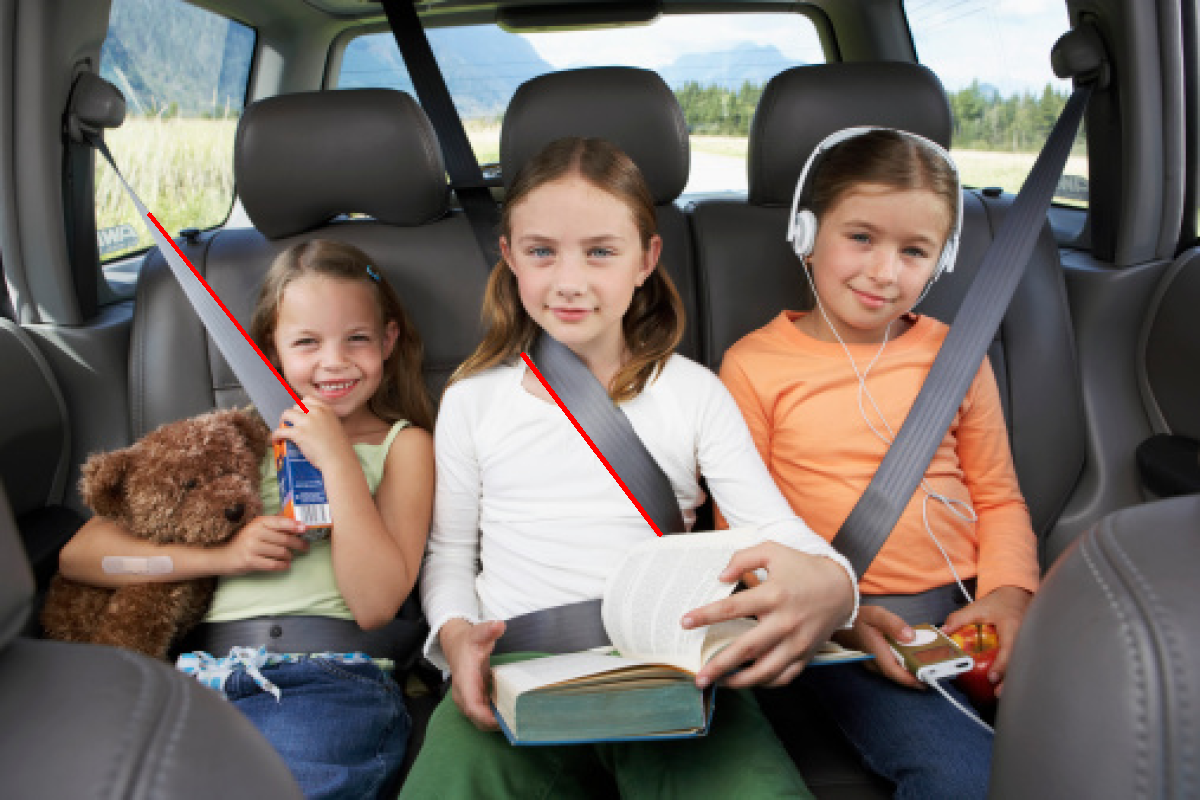

In [24]:
import cv2
import numpy as np
import imutils

#Slope of line
def Slope(a,b,c,d):
    return (d - b)/(c - a)


# Reading Image
belt = cv2.imread("Test1.jpg")

# Resizing The Image
belt = imutils.resize(belt, height=800)

#Converting To GrayScale
gray_belt = cv2.cvtColor(belt, cv2.COLOR_BGR2GRAY)

# No Belt Detected Yet
is_belt = False

# Bluring The Image For Smoothness
blur = cv2.blur(gray_belt, (1, 1))

# Converting Image To Edges
edges = cv2.Canny(blur, 50, 400)

ps = 0
# Previous Line Co-ordinates
px1, py1, px2, py2 = 0, 0, 0, 0

# Extracting Lines
lines = cv2.HoughLinesP(edges, 1, np.pi/270, 30, maxLineGap = 20, minLineLength = 170)

if lines is not None:
    for line in lines:

        # Co-ordinates Of Current Line
        x1, y1, x2, y2 = line[0]

        # Slope Of Current Line
        s = Slope(x1,y1,x2,y2)
        
        # If Current Line's Slope Is Greater Than 0.7 And Less Than 2
        if ((abs(s) > 0.7) and (abs (s) < 2)):

            # And Previous Line's Slope Is Within 0.7 To 2
            if((abs(ps) > 0.7) and (abs(ps) < 2)):

                # And Both The Lines Are Not Too Far From Each Other
                if(((abs(x1 - px1) > 5) and (abs(x2 - px2) > 5)) or ((abs(y1 - py1) > 5) and (abs(y2 - py2) > 5))):

                    # Plot The Lines On "beltframe"
                    cv2.line(belt, (x1, y1), (x2, y2), (0, 0, 255), 3)
                    cv2.line(belt, (px1, py1), (px2, py2), (0, 0, 255), 3)

                    # Belt Is Detected
                    print ("Seat Belt Detected")
                    is_belt = True
           
        ps = s
        px1, py1, px2, py2 = line[0]
        
                   
if is_belt == False:
    print("No Seatbelt detected!")

# Show The "beltframe"
cv2_imshow(belt)
